In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import cv2

In [37]:
im = cv2.imread('./img1.jpeg')  #reads an image into BGR format

im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)  #Converting BGR TO RGB Format
original_shape=im.shape
print(im.shape)

(433, 770, 3)


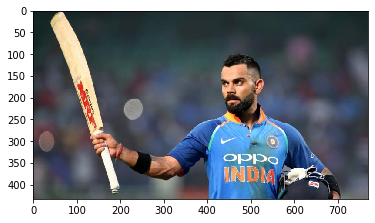

In [38]:
plt.imshow(im)                    # as RGB format
plt.show()

In [39]:
#Flatten each channel of the image

all_pixels = im.reshape((-1 , 3))

print(all_pixels.shape)


(333410, 3)


In [78]:
dominant_colors=3

km = KMeans(n_clusters=dominant_colors)

km.fit(all_pixels)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
centers=km.cluster_centers_

In [80]:
centers = np.array(centers,dtype='uint8')

In [81]:
print(centers)

[[229 192 159]
 [ 90 133 178]
 [ 57  63  72]]


In [82]:
###Plot what all colors are the? 

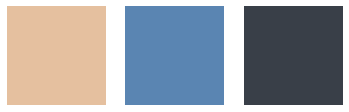

In [83]:
i = 1

plt.figure(0)

colors=[]

for each_col in centers:
    plt.subplot(1,3,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #color swatch
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    
    plt.imshow(a)

plt.show()
    
    
    

In [89]:
print(colors)

[array([229, 192, 159], dtype=uint8), array([ 90, 133, 178], dtype=uint8), array([57, 63, 72], dtype=uint8)]


   # Segmenting our original image

In [92]:
km.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [95]:
temp= np.array(km.labels_)
print(temp.shape)
new_img=np.zeros((temp.shape[0],3),dtype='uint8')

print(new_img.shape)

(333410,)
(333410, 3)


In [96]:
colors

[array([229, 192, 159], dtype=uint8),
 array([ 90, 133, 178], dtype=uint8),
 array([57, 63, 72], dtype=uint8)]

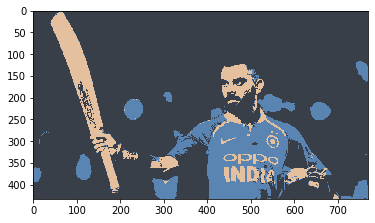

In [97]:

for ix in range(new_img.shape[0]):
    new_img[ix][:] = colors[km.labels_[ix]]
    

new_img = new_img.reshape((original_shape))   
plt.imshow(new_img)
plt.show()
    

    
    
    